<a href="https://colab.research.google.com/github/Bibekpdl1/K-Means-Clustering/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import necessary Libraries and Dependencies

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

2. Load and Analyze the Dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv('/content/drive/My Drive/Personal Projects/K-Means Clustering using Python/student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


3. Scatter Plot of the Dataset

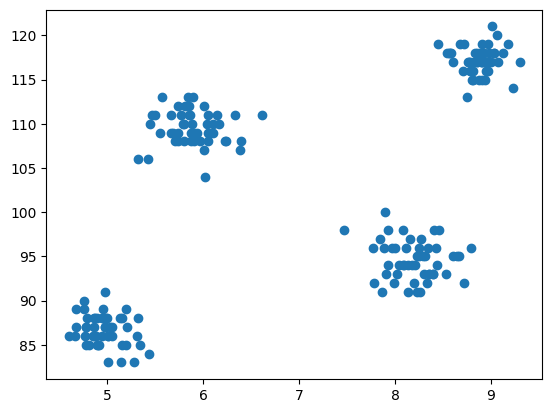

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

4. Import the K-Means fro the Cluster Class of Scikit-Learn

In [24]:
from sklearn.cluster import KMeans

5. Finding the Optimal Value of K using the Elbow Method

In [25]:
# create an empty list for store residuals
wcss = []

for i in range(1,11):
  # create an object of K-Means class
  km = KMeans(n_clusters=i)
  # pass the dataframe to fit the algorithm
  km.fit_predict(df)
  # append inertia value to wcss list
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

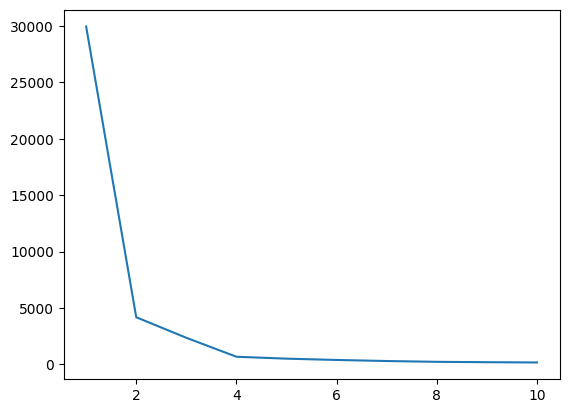

In [26]:
# plot of WCSS vs K to check the optimal value of k
plt.plot(range(1,11),wcss)

6. Fit the K-Means Algorithm with the optimal value of K

In [27]:
X = df.iloc[:,:].values #complete data is used fro model building
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 0, 0, 2, 2, 0, 1, 2, 0, 3, 2, 0, 3, 2, 0, 2, 0, 2, 2, 0, 3,
       0, 3, 3, 0, 3, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 3, 2, 3, 0, 0, 3,
       1, 1, 0, 2, 1, 2, 3, 3, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 3, 1,
       0, 3, 2, 0, 2, 1, 0, 3, 2, 1, 2, 1, 3, 0, 0, 1, 2, 3, 1, 3, 1, 2,
       1, 2, 1, 1, 0, 3, 0, 0, 1, 0, 3, 1, 2, 3, 3, 1, 3, 3, 0, 3, 1, 1,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 0, 0, 2,
       3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 2, 3, 3, 1, 3, 1, 2, 3, 1, 3, 1, 1,
       3, 0, 2, 1, 2, 0, 3, 1, 2, 0, 1, 3, 2, 3, 3, 1, 1, 2, 1, 3, 3, 0,
       1, 2, 3, 1, 1, 2, 2, 2, 0, 3, 0, 0, 1, 2, 0, 0, 3, 3, 0, 3, 1, 2,
       2, 1], dtype=int32)

7. Check the Cluster Assignment of each Category

In [28]:
#checking which all points in dataset belong to which cluster
X[y_means == 3,1]

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

In [29]:
# initialize the random centroids and comparing
km_new = KMeans(n_clusters=4, init='random')
y_means_new = km_new.fit_predict(X)
y_means_new

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 2, 2, 0, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1,
       2, 1, 1, 2, 1, 3, 2, 0, 3, 0, 3, 0, 2, 2, 3, 0, 1, 0, 1, 2, 2, 1,
       3, 3, 2, 0, 3, 0, 1, 1, 3, 2, 3, 0, 0, 3, 0, 3, 0, 2, 2, 3, 1, 3,
       2, 1, 0, 2, 0, 3, 2, 1, 0, 3, 0, 3, 1, 2, 2, 3, 0, 1, 3, 1, 3, 0,
       3, 0, 3, 3, 2, 1, 2, 2, 3, 2, 1, 3, 0, 1, 1, 3, 1, 1, 2, 1, 3, 3,
       2, 3, 0, 0, 2, 3, 2, 0, 3, 1, 1, 0, 2, 3, 2, 1, 2, 0, 1, 2, 2, 0,
       1, 1, 0, 3, 0, 1, 2, 2, 2, 1, 0, 1, 1, 3, 1, 3, 0, 1, 3, 1, 3, 3,
       1, 2, 0, 3, 0, 2, 1, 3, 0, 2, 3, 1, 0, 1, 1, 3, 3, 0, 3, 1, 1, 2,
       3, 0, 1, 3, 3, 0, 0, 0, 2, 1, 2, 2, 3, 0, 2, 2, 1, 1, 2, 1, 3, 0,
       0, 3], dtype=int32)

In [30]:
# check how many values match
sum(y_means == y_means_new)

0

8. Visualizing the clusters

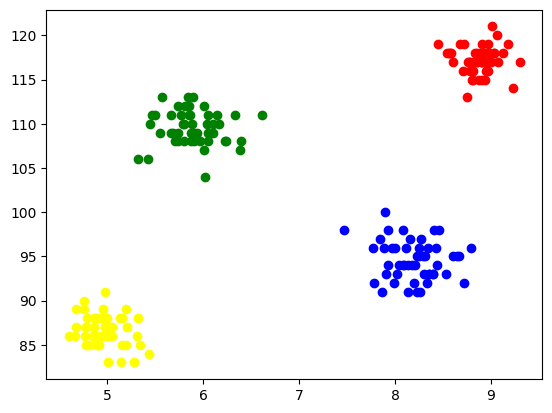

In [31]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

9. K-Means on 3D Data


In [32]:
# crate a synthetic dataset from sklearn
from sklearn.datasets import make_blobs # male synthetic dataset
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]
X,y = make_blobs(n_samples = 200, cluster_std=cluster_std, centers=centroids,n_features=3, random_state=1)

In [33]:
# scatter plot of the dataset
import plotly.express as px
fig = px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2])
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

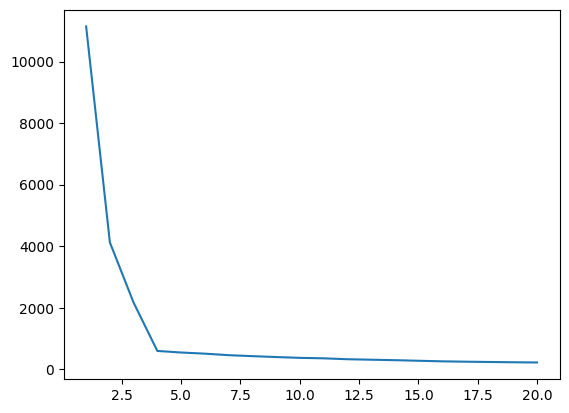

In [36]:
wcss = []
for i in range(1,21):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

plt.plot(range(1,21),wcss)

In [37]:
# fit the K-Means algorithm with the optimal value of k
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [39]:
# Analyse the different clusters formed
df = pd.DataFrame()
df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

fig = px.scatter_3d(df,x='col1', y='col2',z='col3', color='label')
fig.show()